First, we need to convert our end_date values into dates.

Ok, now let's coerce the string into a datetime.  First we ask the great oracle Google how we can [convert a string into a datetime](https://www.google.com/search?q=datetime+from+string+python&oq=datetime+from+st&aqs=chrome.0.0j69i57j0l4.2653j0j7&sourceid=chrome&ie=UTF-8).  Then we follow the directions in the search results. [One of those results](https://chrisalbon.com/python/basics/strings_to_datetime/) says we can convert with somthing like the following.

In [7]:
from datetime import datetime
start = '2011-01-03'
datetime.strptime(start, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

That gets us part of the way, but our date information includes information about minutes or seconds. So we can either remove that ending data, or we can do some more searching on Google. We go for the searching on Google and wind up with the following.

In [8]:
from datetime import datetime
end_date = revenues[0]['end_date']
datetime.strptime(end_date, '%Y-%m-%dT%H:%M:%S.%f')

datetime.datetime(2016, 12, 31, 0, 0)

Ok, now it's that we were able to accomplish this for the attributes of one dictionary, let's use a loop to coerce each dictionary in `revenues`.

In [14]:
from datetime import datetime
formatted_revenues = []
for revenue in revenues:
    total = int(revenue['total_receipts'])
    end_date = datetime.strptime(revenue['end_date'], '%Y-%m-%dT%H:%M:%S.%f')
    revenue = {
        'total_receipts': total,
        'end_date': end_date,
    }
    formatted_revenues.append(revenue)
formatted_revenues[0:2]

[{'total_receipts': 56182, 'end_date': datetime.datetime(2016, 12, 31, 0, 0)},
 {'total_receipts': 9400, 'end_date': datetime.datetime(2017, 8, 31, 0, 0)}]

Ok, now we can sort by date time.

In [15]:
sorted_by_date = sorted(revenues, key = lambda revenue: revenue['end_date'])
sorted_by_date[0:3]

[{'total_receipts': 0, 'end_date': '2015-08-31T00:00:00.000'},
 {'total_receipts': 66609, 'end_date': '2015-09-30T00:00:00.000'},
 {'total_receipts': 67048, 'end_date': '2015-10-31T00:00:00.000'}]

Now that our date is in the right format, we just create the list of dates for our x values, and the total receipts for the y values.

In [32]:
dates = list(map(lambda revenue: revenue['end_date'], revenues))
totals = list(map(lambda revenue: revenue['total_receipts'], revenues))

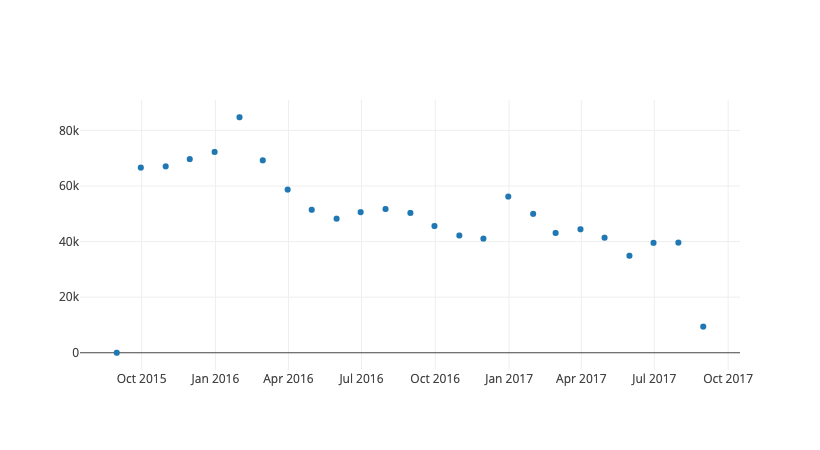

In [34]:
iplot([{'x': dates, 'y': totals, 'mode': 'markers'}])

> Perhaps format by month number instead, and then delay talking about how we did this as a bonus.